# Doris Chen

## Problem 1

In [1]:
import pandas as pd
import numpy as np
from sklearn.naive_bayes import MultinomialNB
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from matplotlib import pyplot as plt
import graphviz

In [2]:
df = pd.read_csv("Data/Titanic/Titanic-expanded.csv")
df.head(5)

,Class,Sex,Age,Survived
0,3rd,Male,Child,No
1,3rd,Male,Child,No
2,3rd,Male,Child,No
3,3rd,Male,Child,No
4,3rd,Male,Child,No


In [3]:
attributes = df.drop(['Survived'], axis = 1)
attributes = pd.get_dummies(attributes)
target = df.Survived

a)

In [4]:
hparam = {'alpha':np.arange(1,1001)}

In [5]:
NBayes = MultinomialNB()
NBayesCV = GridSearchCV(NBayes,param_grid=hparam,n_jobs=-1) 
NBayesCV.fit(attributes,target)

GridSearchCV(estimator=MultinomialNB(), n_jobs=-1,
             param_grid={'alpha': array([   1,    2,    3,    4,    5,    6,    7,    8,    9,   10,   11,
         12,   13,   14,   15,   16,   17,   18,   19,   20,   21,   22,
         23,   24,   25,   26,   27,   28,   29,   30,   31,   32,   33,
         34,   35,   36,   37,   38,   39,   40,   41,   42,   43,   44,
         45,   46,   47,   48,   49,   50,   51,   52,   53,   54,   55,
         56,   57,   58,   59,   60,   61,   62,   63,   64,   65,   66,
         67,   68,   69,   70,   71,   72,   73,   74,   75,   76,   77,
         78,   79,   80,   81,   82,   83,   84,   85,   86,   87,   88,
         89,   90,   91,   92,   93,   94,   9...
        914,  915,  916,  917,  918,  919,  920,  921,  922,  923,  924,
        925,  926,  927,  928,  929,  930,  931,  932,  933,  934,  935,
        936,  937,  938,  939,  940,  941,  942,  943,  944,  945,  946,
        947,  948,  949,  950,  951,  952,  953,  954,  955,  

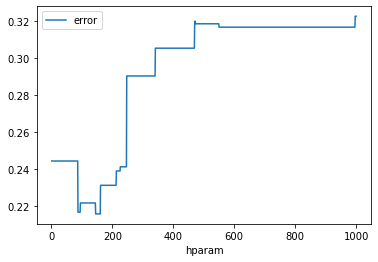

In [6]:
results = pd.DataFrame()
results['hparam'] = hparam['alpha']
results['error'] = 1 - NBayesCV.cv_results_['mean_test_score']
results.plot.line(x='hparam', y='error')

In [7]:
print('best_params', NBayesCV.best_params_)
print('Naive Bayes error rate:', (1- NBayesCV.best_score_).round(3))

best_params {'alpha': 145}
Naive Bayes error rate: 0.216


In [8]:
target.value_counts()

No     1490
Yes     711
Name: Survived, dtype: int64

In [9]:
print('Test Baseline:', (711/(1490+711)))

Test Baseline: 0.3230349840981372


My best generalization error rate for Naive Bayes is 0.216 and is better than baseline error rate which I guessed to be 0.323.

b)

In [10]:
hparam = {'max_depth':np.linspace(1,100,100)}

In [11]:
Tree = DecisionTreeClassifier()
TreeCV = GridSearchCV(Tree, param_grid = hparam) 
TreeCV.fit(attributes,target)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': array([  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,
        12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,  22.,
        23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,  33.,
        34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,  44.,
        45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,  55.,
        56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,  66.,
        67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,  77.,
        78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,  88.,
        89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,  99.,
       100.])})

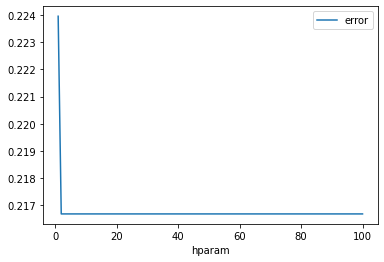

In [12]:
results = pd.DataFrame()
results['hparam'] = hparam['max_depth']
results['error'] = 1 - TreeCV.cv_results_['mean_test_score']
results.plot.line(x='hparam',y='error')

In [13]:
print('best_params', TreeCV.best_params_)
print('Decision Tree error rate:', (1- TreeCV.best_score_).round(3))

best_params {'max_depth': 2.0}
Decision Tree error rate: 0.217


My best generalization error rate for Decision Tree is 0.217 and is better than baseline error rate which I guessed to be 0.323, which is only a little worse than Naive Bayes.

## Problem 2

a)

In [14]:
df = pd.read_csv("Data/Mushrooms/Mushrooms.csv")
df.head(5)

,target,cap-shape,cap-surface,cap-color,bruises?,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,poisonous,convex,smooth,brown,bruises,pungent,free,close,narrow,black,...,smooth,white,white,partial,white,one,pendant,black,scattered,urban
1,edible,convex,smooth,yellow,bruises,almond,free,close,broad,black,...,smooth,white,white,partial,white,one,pendant,brown,numerous,grasses
2,edible,bell,smooth,white,bruises,anise,free,close,broad,brown,...,smooth,white,white,partial,white,one,pendant,brown,numerous,meadows
3,poisonous,convex,scaly,white,bruises,pungent,free,close,narrow,brown,...,smooth,white,white,partial,white,one,pendant,black,scattered,urban
4,edible,convex,smooth,gray,no,none,free,crowded,broad,black,...,smooth,white,white,partial,white,one,evanescent,brown,abundant,grasses


Ran Mushrooms-preprocessing.ipynb, new csv created

b)

In [15]:
target = df.target
attributes = df.drop(['target'], axis = 1)
attributes.shape

(8124, 22)

In [16]:
attributes = pd.get_dummies(attributes)
attributes.shape[1]

116

the file Mushrooms.csv contains 8124 records and 22 mushroom attributes (excluding the target attribute, edibility).
116 mushroom attributes are there after one-hot-encoding the mushroom attribute data.

c)

In [17]:
hparam = {'alpha':np.linspace(0,10000,1001)}
NBayes = MultinomialNB()
NBayesCV = GridSearchCV(NBayes,param_grid=hparam,n_jobs=-1) 
NBayesCV.fit(attributes,target)

C:\Users\chenx16\anaconda3\lib\site-packages\sklearn\naive_bayes.py:511: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn('alpha too small will result in numeric errors, '


GridSearchCV(estimator=MultinomialNB(), n_jobs=-1,
             param_grid={'alpha': array([    0.,    10.,    20., ...,  9980.,  9990., 10000.])})

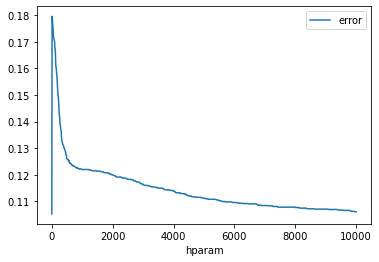

In [18]:
results = pd.DataFrame()
results['hparam'] = hparam['alpha']
results['error'] = 1 - NBayesCV.cv_results_['mean_test_score']
results.plot.line(x='hparam', y='error')

In [19]:
print('best_params', NBayesCV.best_params_)
print('Naive Bayes error rate:', (1- NBayesCV.best_score_).round(3))

best_params {'alpha': 0.0}
Naive Bayes error rate: 0.105


In [20]:
target.value_counts()

edible       4208
poisonous    3916
Name: target, dtype: int64

In [21]:
print('Test Baseline:', (3916/(4208+3916)))

Test Baseline: 0.48202855736090594


My best generalization error rate for Naive Bayes is 0.105 and is much better than baseline error rate which I guessed to be 0.482.

d)

In [22]:
hparam = {'max_depth':np.arange(1,51)}
Tree = DecisionTreeClassifier()
TreeCV = GridSearchCV(Tree, param_grid = hparam) 
TreeCV.fit(attributes,target)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50])})

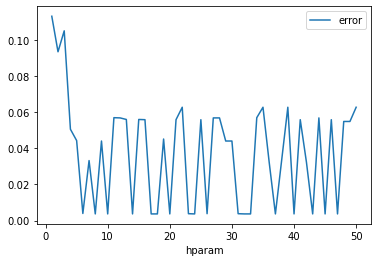

In [23]:
results = pd.DataFrame()
results['hparam'] = hparam['max_depth']
results['error'] = 1 - TreeCV.cv_results_['mean_test_score']
results.plot.line(x='hparam',y='error')

In [24]:
print('best_params', TreeCV.best_params_)
print('Decision Tree error rate:', (1- TreeCV.best_score_).round(3))

best_params {'max_depth': 8}
Decision Tree error rate: 0.004


My best generalization error rate for Decision Tree is 0.004 and is better than baseline error rate which I guessed to be 0.482, which is better than Naive Bayes.

e)

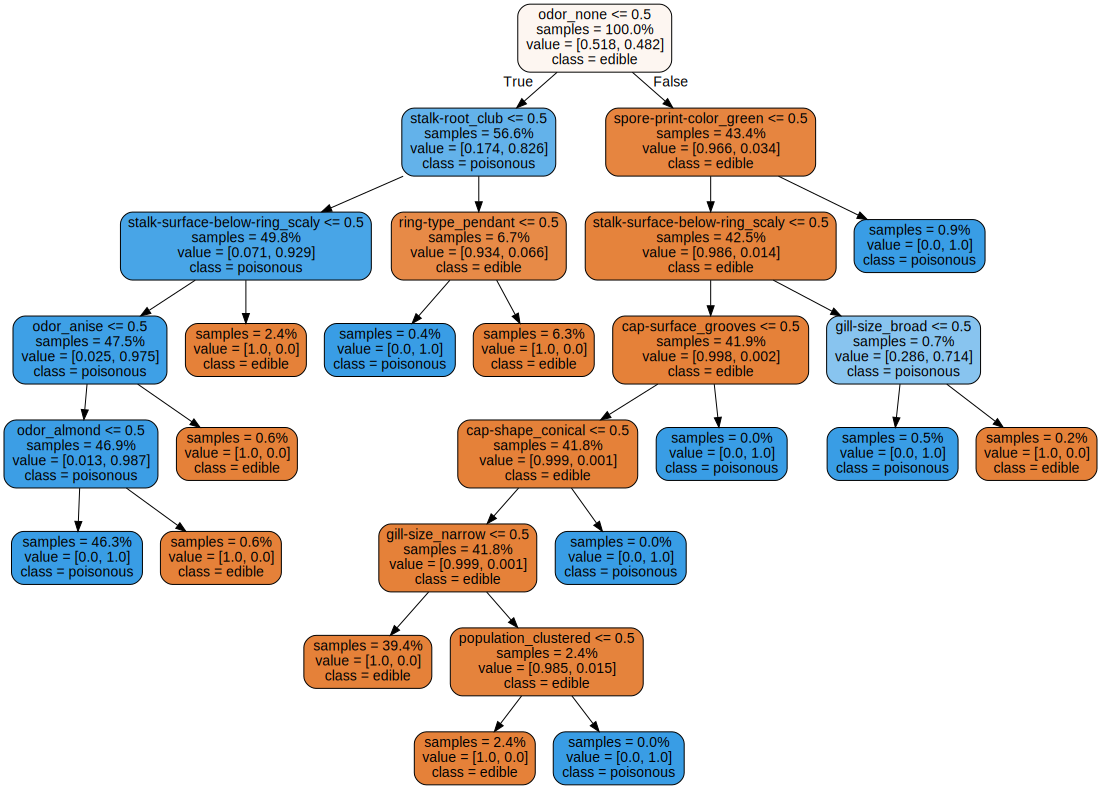

In [25]:
Tree.fit(attributes,target)
dot_data = tree.export_graphviz(TreeCV.best_estimator_,
                               out_file=None,
                               feature_names=attributes.columns,
                               class_names = ['edible','poisonous'],
                               proportion=True,
                               impurity=False,
                               filled=True,
                               rounded=True)
graph = graphviz.Source(dot_data)
graph.render('Mushroom')
graph

Because the first entry of the value field in each node is the proportion of edible mushrooms at that node, the odor is the most substantial attribute to determine whether the mushroom is poisone or edible.

The depth of the tree is only 7 instead of 14 because all the leaf nodes are either all edible or all poisonous.